In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [11]:
from pmdarima import auto_arima

In [13]:
df1 = pd.read_csv('DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [14]:
df2 = pd.read_csv('TradeInventories.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'MS'

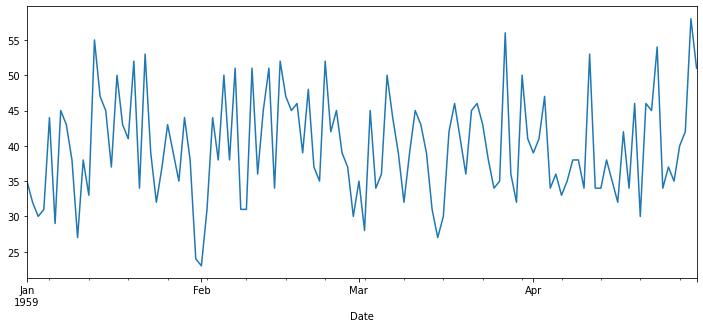

In [16]:
df1['Births'].plot(figsize=(12, 5))

In [18]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')

    labels = ['ADF Test Statistics', 'p-value', 'no. og lags used', 'no. of observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical values ({key})'] = val

    print(out.to_string())

    if result[1] <= 0.05:
        print('Strong evidence against the null hypopthesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [19]:
adf_test(df1['Births'])

Augmented Dickey-Fuller test: 
ADF Test Statistics     -9.855384e+00
p-value                  4.373545e-17
no. og lags used         0.000000e+00
no. of observations      1.190000e+02
critical values (1%)    -3.486535e+00
critical values (5%)    -2.886151e+00
critical values (10%)   -2.579896e+00
Strong evidence against the null hypopthesis
Reject the null hypothesis
Data has no unit root and is stationary


In [20]:
auto_arima(df1['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sat, 15 Aug 2020   AIC                            823.489
Time:                        06:40:01   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [22]:
model = ARMA(train['Births'], order=(2,2))

In [23]:
results = model.fit()

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sat, 15 Aug 2020   AIC                            627.809
Time:                        07:06:40   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.608      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [25]:
start = len(train)
end = len(train) + len(test) - 1

In [26]:
predictions = results.predict(start, end).rename('ARMA 2,2 Predictions')

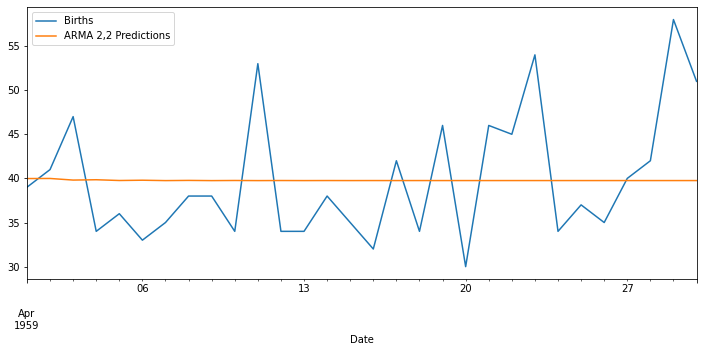

In [27]:
test['Births'].plot(figsize=(12,5), legend=True)
predictions.plot(legend=True)

In [28]:
test.mean()

Births    39.833333
dtype: float64

In [29]:
predictions.mean()

39.777427784045514

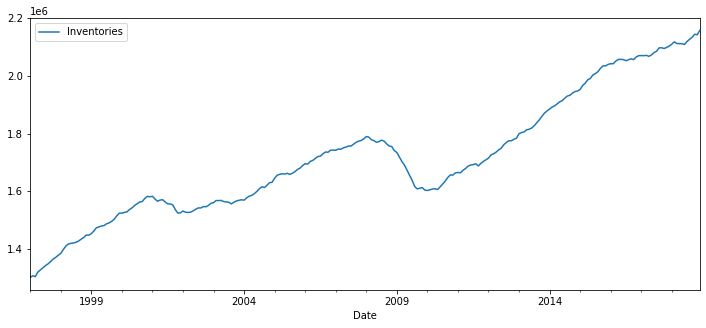

In [30]:
df2.plot(figsize=(12,5))

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

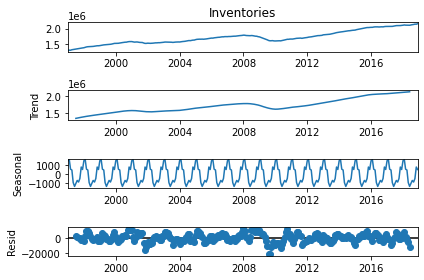

In [34]:
result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

In [35]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 15 Aug 2020   AIC                           5348.037
Time:                        07:20:46   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
from statsmodels.tsa.statespace.tools import diff

In [40]:
df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)

In [41]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller test: 
ADF Test Statistics       -3.412249
p-value                    0.010548
no. og lags used           4.000000
no. of observations      258.000000
critical values (1%)      -3.455953
critical values (5%)      -2.872809
critical values (10%)     -2.572775
Strong evidence against the null hypopthesis
Reject the null hypothesis
Data has no unit root and is stationary


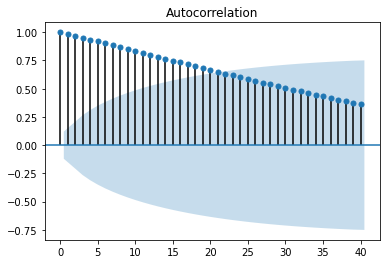

In [43]:
plot_acf(df2['Inventories'], lags=40);

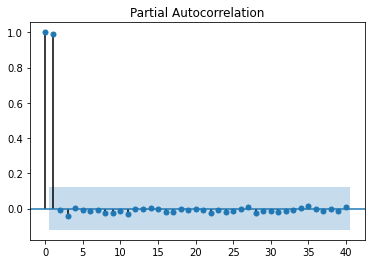

In [44]:
plot_pacf(df2['Inventories'], lags=40);

In [47]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0, max_p=2, max_q=2, seasonal=False, trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.314 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 15 Aug 2020   AIC                           5348.037
Time:                        07:58:22   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [49]:
model = ARIMA(train['Inventories'], order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Sat, 15 Aug 2020   AIC                           4980.790
Time:                        08:05:19   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.6171   1344.919      2.378      0.017     561.625    5833.610
ar.L1.D.Inventories     0.9026      0.039     23.013      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.049      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [50]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA (1,1,1) Predictions')

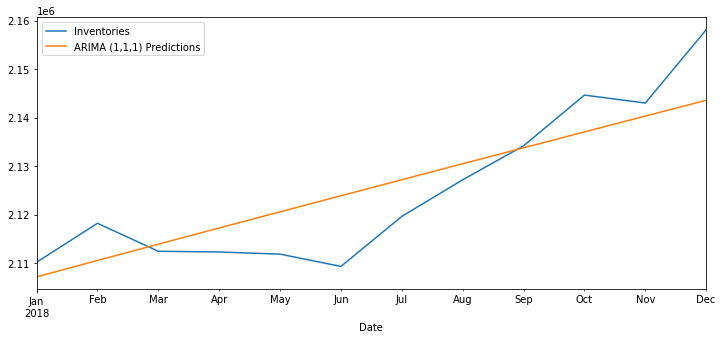

In [51]:
test['Inventories'].plot(figsize=(12,5), legend=True)
predictions.plot(legend=True)

In [52]:
from statsmodels.tools.eval_measures import rmse

In [53]:
error = rmse(test['Inventories'], predictions)
error

7789.561238050531

In [54]:
test['Inventories'].mean()

2125075.6666666665

In [55]:
predictions.mean()

2125465.342826205

In [57]:
model = ARIMA(df2['Inventories'], order=(1,1,1))
results = model.fit()
fcast = results.predict(start=len(df2), end=len(df2)+11, typ='levels').rename('ARIMA (1,1,1) Forecast')

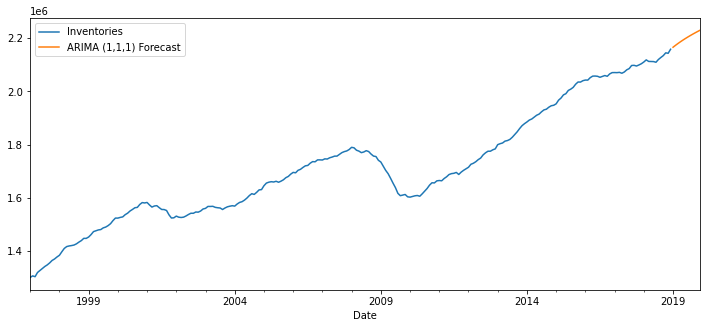

In [59]:
df2['Inventories'].plot(figsize=(12,5), legend=True)
fcast.plot(legend=True)